## DDA3020 Autumn 2023 Homework 3 

### Programming Part 2：Neural Networks with PyTorch

--------------------------------------------------------------------------------------------------------------------------
In this notebook, we will build a fully-connected Neural Network and a Convolutional Neural Network with PyTorch, then apply on the MNIST data-set.

--------------------------------------------------------------------------------------------------------------------------


In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


### 1. Preparation: PyTorch basics and back-propagation (10 points)
PyTorch is one of the most popular frameworks for Deep Learning. To have a quick insight on how to use PyTorch, let's say that most of the functionalities of a numpy array are also maintained for torch tensors, except that the grammar might be slightly different. 

##### 1-1 (0.5 point) 

Set the random seed to 123. Create a random Tensor `a` of shape [3,20,20] with default normal distribution $\mathcal{N}(0,1)$. 

In [2]:
torch.manual_seed(123)
# create tensor a
a = torch.randn(3, 20, 20)
a

tensor([[[ 0.3374, -0.1778, -0.3035,  ..., -1.0205, -0.1690,  0.9178],
         [ 1.5810,  1.3010,  1.2753,  ..., -0.9343, -0.4991, -1.0867],
         [ 0.8805,  1.5542,  0.6266,  ..., -0.8036, -0.2808,  0.7697],
         ...,
         [ 0.9376, -0.9225,  0.7047,  ...,  1.7409,  0.2698,  0.9595],
         [-1.0253, -0.5505,  1.0264,  ..., -0.2866,  0.4343, -0.1340],
         [-2.1467, -1.7984, -0.6822,  ..., -1.4498,  1.5446,  1.0394]],

        [[ 2.1681,  0.4884,  0.3359,  ...,  1.3258,  0.2103,  1.7876],
         [-1.2128,  0.2045,  1.1051,  ...,  0.7392, -0.4931,  0.4073],
         [-1.0394, -0.3226,  0.7226,  ..., -0.3845,  0.6554, -0.1045],
         ...,
         [ 0.9202,  0.1743, -0.4796,  ...,  1.0720,  1.1054, -2.0586],
         [ 0.2878, -1.1389,  0.1729,  ..., -0.7809, -0.2270, -0.4358],
         [ 0.8209, -0.6353, -0.4386,  ..., -0.4097, -0.0627,  0.0175]],

        [[ 1.3715, -0.2226,  1.0566,  ..., -1.6292,  0.6107,  1.2718],
         [-0.9422, -0.2667, -0.3216,  ...,  0

##### 1-2 (0.5 point) 
1. Transfer `a` to a numpy array and print `a[0,0]`.
2. Transfer `a` back to torch tensor and print `a[0,0]`.

**Apart from this block, in this section, you shall not to use numpy**



In [3]:
# 1
a_np = np.array(a)
print("1:", a_np[0, 0])
# 2 
a = torch.from_numpy(a_np)
print("2:", a[0, 0])

1: [ 0.3373702  -0.17777722 -0.3035276  -0.58801186  0.3486052   0.66034096
 -0.21963762 -0.37916982  0.76710707 -1.192502    0.6983519  -1.4097229
  0.17937961  1.895148    0.49544638  0.26919857 -0.07702024 -1.0204719
 -0.16895628  0.91776454]
2: tensor([ 0.3374, -0.1778, -0.3035, -0.5880,  0.3486,  0.6603, -0.2196, -0.3792,
         0.7671, -1.1925,  0.6984, -1.4097,  0.1794,  1.8951,  0.4954,  0.2692,
        -0.0770, -1.0205, -0.1690,  0.9178])


##### 1-3 (1 point) 

Print for `a`: 
- its shape (size)
- its mean value over all entries
- its std over all entries
- its median value over all entries

In [4]:
print("size of a:", a.size())
print("mean value of a:", a.mean())
print("std of a:", a.std())
print("median value of a:", a.median())

size of a: torch.Size([3, 20, 20])
mean value of a: tensor(-0.0028)
std of a: tensor(0.9965)
median value of a: tensor(-0.0016)


##### 1-4 (1 point)

Compute: 
- `b2` = the mean values of `a` along axis 2
- `b12`= the mean values of `a` along axis 1 and 2
- Print the shape of `b2` and `b12`

In [5]:
b2 = torch.mean(a, dim=2)
b12 = torch.mean(a, dim=(1, 2))
print("size of b2:", b2.size())
print("size of b12:", b12.size())

size of b2: torch.Size([3, 20])
size of b12: torch.Size([3])


##### 1-5 (3 point) 

Create a neural network `model_tmp` of 3 layers:

- layer 1 ---------- : receives input of length 400, has 128 neurons with bias

- activation 1 ----- : relu

- layer 2 ---------- : receives input of length 128, has 64 neurons with bias

- activation 2 ----- : relu

- layer 3 ---------- : receives input of length 64, has 4 neurons without bias

- activation 3 ----- : softmax over axis -1

[Hint]: you will mainly use modules from torch.nn



In [6]:
import torch.nn as nn
class ModelTmp(nn.Module):
    def __init__(self):
        super(ModelTmp, self).__init__()
        # fixed seed for reproductive results
        torch.manual_seed(114514)
        self.layer1 = nn.Linear(400, 128, bias=True) # construct layer 1
        self.activation1 = nn.ReLU()                 # construct activation 1
        self.layer2 = nn.Linear(128, 64, bias=True)  # construct layer 2
        self.activation2 = nn.ReLU()                 # construct activation 2
        self.layer3 = nn.Linear(64, 4, bias=False)   # construct layer 3
        self.activation3 = nn.Softmax(dim=-1)        # construct activation 3

    def forward(self, x):
        x = self.activation1(self.layer1(x))
        x = self.activation2(self.layer2(x))
        x = self.activation3(self.layer3(x))
        return x

model_tmp = ModelTmp()

##### 1-6 (1 point) 

Flatten the two last axis of `a` and apply `model_tmp` on `a`. Print your output.


In [7]:
# faltten the last two axis of a
a_f = torch.flatten(a, start_dim=-2, end_dim=-1)
output_1_6 = model_tmp(a_f)
print(output_1_6)

tensor([[0.2630, 0.2262, 0.2660, 0.2448],
        [0.2543, 0.2649, 0.2401, 0.2407],
        [0.2760, 0.2649, 0.2663, 0.1928]], grad_fn=<SoftmaxBackward0>)


##### 1-7 (1 point) 
Calculate the MSE loss between `this output` and an `all-1 tensor`. Print your result.

[Hint]: You can use either **torch.nn.functional** or **torch.nn** or **torch**


In [8]:
import torch.nn.functional as F
all_1 = torch.ones_like(output_1_6)
mse = F.mse_loss(output_1_6, all_1)
print("MSE between two tensors:", mse)

MSE between two tensors: tensor(0.5630, grad_fn=<MseLossBackward0>)


##### 1-8 (1 point) 
Excecute `back-propagation` on this loss and extract the gradient of the `final layer` of model_tmp as `grd`. Print `grd[:,5]`

[Hint]: To extract the weights, you can use w_last_layer = list(model.parameters())[-1] or any other more elegant phrase.

In [9]:
# clear gradients
model_tmp.zero_grad()
# back-propagation
mse.backward()
# extract weights of the last layer
w_last_layer = list(model_tmp.parameters())[-1]
# extract gradients of the last layer
grd = w_last_layer.grad
print(grd[:, 5])

tensor([ 0.0003,  0.0002,  0.0001, -0.0006])


##### 1-9 (1 point) 
1. Create a `SGD optimizer` with learning_rate = `1e-3` associated with the parameters of model_tmp. 
2. Step this optimizer. 
3. Verify that the `variation of the parameters` of the last layer equals `1e-3 * grd`, except that there might be some machine inaccuracies.

[Hint]: You can simple print something and we'll see that most of the entries are near 0 or that most of the entries are near 0.001

In [10]:
import torch.optim as optim

# create SGD optimizer
optimizer = optim.SGD(model_tmp.parameters(), lr=1e-3)
# step the optimizer
optimizer.zero_grad()
optimizer.step()
# compute the variation of params of the last layer
#vari = torch.abs(list(model_tmp.parameters())[-1] - (1e-3 * grd))
vari = torch.abs(1e-3 * grd / list(model_tmp.parameters())[-1])
vari = torch.round(vari, decimals=3)
torch.set_printoptions(sci_mode=False)
print(vari)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.

### 2. Simple fully-connected NN (MLP) (12 points)

**`Procedure`**: (1+1+1+1 = 4 points)
1. Create a fully-connected neural network, which will be a MLP. This NN will take the fattened images ([28,28] -> [28*28]) as input.  
2. Choose your optimizer and criterion (loss function).
3. Train some epoches (you can start with 10) on the MNIST data-set.
4. Keep your best model according to validation loss.
5. `Save your best model and attach it in your submitted zip`.

**`Required outputs`**: (1+1+2 = 4 points)
1. Print averaged train loss and validation loss at the end of each epoch.
2. After the training finished, plot your train (validation, respectively) loss of each step (epoch, respectively) on a same graph. Keep the x-axis aligned.
3. Test your best model on test set and print (1) test loss value as well as (2) the rate of correct prediction. 


4 points are given according to your test performance. `4 is given if you have correct test prediction rate > 90.00%`



In [11]:
#### prepare data-set
#### you re expected to have either pickle or torchvision in your environment

import torch
from torch.utils.data import DataLoader, Dataset, Subset
import importlib

# python > 3.4
if importlib.util.find_spec('torchvision') is None: # if you do not have torchvision, use TA's downloaded data
    import pickle as pkl

    with open('./MNIST_dataset_local','rb') as read_file:
        data = pkl.load(read_file)
        read_file.close()

    train_images, train_labels = data['train']
    test_images, test_labels = data['test']

    val_images, val_labels = train_images[5500:], train_labels[5500:]
    train_images, train_labels = train_images[:5500], train_labels[:5500]

    class myMnistDataSet(Dataset):

        def __init__(self,images,labels):
            self.X = images[:,None,...]
            self.y = labels

        def __len__(self):
            return len(self.X)

        def __getitem__(self, index):
            image = self.X[index]
            label = self.y[index]
            return torch.Tensor(image), torch.tensor(label)[0]
        
    mnist_train = myMnistDataSet(train_images, train_labels.astype('int64'))
    mnist_test = myMnistDataSet(test_images, test_labels.astype('int64'))
    mnist_val = myMnistDataSet(val_images, val_labels.astype('int64'))

else: # use torchvision
    from torchvision import transforms, datasets

    mnist_download_path = './MNIST_dataset'
    datasets.MNIST(root=mnist_download_path, download=True)

    mnist_train = datasets.MNIST(root = mnist_download_path, train = True, transform=transforms.ToTensor())
    mnist_val   = Subset(mnist_train, list(range(5500,6000)))
    mnist_train = Subset(mnist_train, list(range(5500)))

    mnist_test  = datasets.MNIST(root = mnist_download_path, train = False, transform=transforms.ToTensor())


def get_loaders(batch_size):
    train_loader = DataLoader(mnist_train, batch_size = batch_size, shuffle=True)
    val_loader   = DataLoader(mnist_val, batch_size = batch_size, shuffle=False)
    test_loader  = DataLoader(mnist_test, batch_size = batch_size, shuffle=False)

    return train_loader, val_loader, test_loader


# get to know your loader
batch_size = 10
train_loader, val_loader, test_loader = get_loaders(batch_size)

for im, l in val_loader:
    break

print(im.shape, l.shape)
print(l)

torch.Size([10, 1, 28, 28]) torch.Size([10])
tensor([1, 9, 0, 9, 7, 0, 5, 1, 2, 2])


To create fully-connected NN, we shall guarantee that the number of nuerons and inputs of each layer are matched to each other by the direction of flow in and flow out.

Here we use a 4-layer NN to implement training on data

In [12]:
# create MLP
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [13]:
# choose optimizer and loss function
model = MLP()
optimizer = optim.SGD(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

The following part shall be important for conducting the rest tests. Define functions for training, validating and testing on corresponding datasets.

Train function returns $Average\  loss$ while Validation & Test functions return $(Average\  loss, Accuracy)$

In [14]:
# train function
def train(model, train_loader, optimizer, criterion):
    model.train()
    total_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

# validate function
def validate(model, val_loader, criterion):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            output = model(images)
            loss = criterion(output, labels)
            total_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return total_loss / len(val_loader), correct / total

# test function
def test(model, test_loader, criterion):
    total_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            output = model(images)
            loss = criterion(output, labels)
            total_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return total_loss / len(test_loader), correct / total

The $train \_test$ function would automatically train and implement validation on validation set, consequently it will also save the best model according to the validation loss.

In [15]:
# implementation of training & validation
def train_test(model, num_epochs, train_loader, optimizer, criterion, save_path):
    train_loss = []
    val_loss = []
    val_accuracy = []
    best_val_loss = float('inf')

    for epoch in range(num_epochs):
        ts = train(model, train_loader, optimizer, criterion)
        vl, va = validate(model, val_loader, criterion)

        if vl < best_val_loss:
            best_val_loss = vl
            # save the model with the best performance
            torch.save(model, save_path)

        train_loss.append(ts)
        val_loss.append(vl)
        val_accuracy.append(va)
    
        print(f"Epoch [{epoch+1}/{num_epochs}]: Train loss: {ts:.4f}, Val loss: {vl:.4f}, Val accuracy: {va:.4f}")

    plt.plot(range(1, num_epochs+1), train_loss, label='Train')
    plt.plot(range(1, num_epochs+1), val_loss, label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()  

Here we can adjust number of epoches to obtain better performance, where here we choose 10 epoches with learning rate = 1e-3

Epoch [1/10]: Train loss: 0.7070, Val loss: 0.4438, Val accuracy: 0.8639
Epoch [2/10]: Train loss: 0.2851, Val loss: 0.3285, Val accuracy: 0.8991
Epoch [3/10]: Train loss: 0.1813, Val loss: 0.2962, Val accuracy: 0.9101
Epoch [4/10]: Train loss: 0.1256, Val loss: 0.3032, Val accuracy: 0.9108
Epoch [5/10]: Train loss: 0.0886, Val loss: 0.3144, Val accuracy: 0.9100
Epoch [6/10]: Train loss: 0.0611, Val loss: 0.2834, Val accuracy: 0.9198
Epoch [7/10]: Train loss: 0.0416, Val loss: 0.2881, Val accuracy: 0.9221
Epoch [8/10]: Train loss: 0.0279, Val loss: 0.2900, Val accuracy: 0.9233
Epoch [9/10]: Train loss: 0.0205, Val loss: 0.2932, Val accuracy: 0.9240
Epoch [10/10]: Train loss: 0.0150, Val loss: 0.2912, Val accuracy: 0.9246


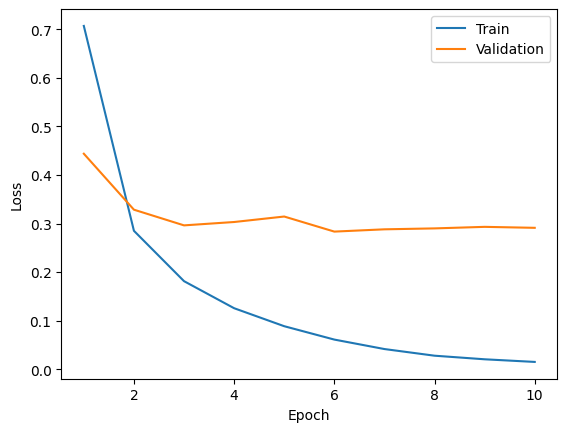

In [16]:
if __name__ == '__main__':
    num_epochs = 10
    path = 'best_nn'
    train_test(model, num_epochs, train_loader, optimizer, criterion, path)

Now we test the best model on the test set

In [17]:
# Load the model
model_ = torch.load(path)

# Evaluate the model on the test set
test_loss, accuracy = test(model_, test_loader, criterion)

print("Loss on test set:", round(test_loss, 4))
print("Rate of correct prediction on test set:", f'{100 * accuracy:.2f}%')

Loss on test set: 0.2525
Rate of correct prediction on test set: 92.61%


##### Therefore we may conclude that the model has a good performance on the test set with rate of correct prediction over 0.9

### 3. Bonus - Weight game (Bonus 2+4+1 = 7 points. Bonus is for this exercise exclusively)

3-1. Display
- The average image of respectively label 1-10 over the validation set.

3-2. Build a 1-layer NN for this problem. Use `Binary Cross Entropy Loss` as validation criterion. Train some epoches until `validation loss < 0.1`. This 1-layer NN has no more than 2 parameters (w and b). Display w with respect to label 1-10, for:

 - Before training (randomly initialized weights). Print the validation loss at this moment.
 - After val loss < 0.1 

3-3. Use **`one word`** to summarize the mecanism with which this NN works.

[Hint]: 
 - For display, please refer to solution_HW1_polynomial_regression for loop structure. This time you will use plt.imshow()  
 - The weight shape is [10,28*28]. Reshape to [10,28,28] then plot 10 times [28,28]

#### 3.1

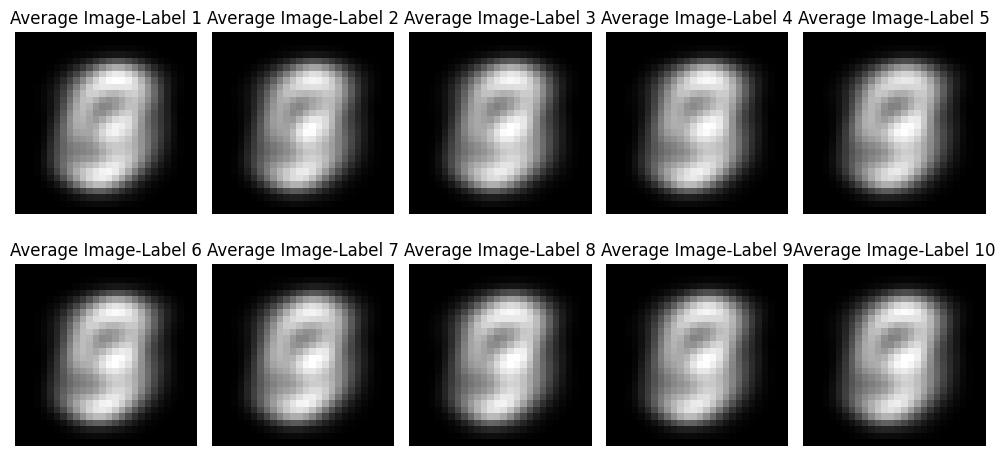

In [18]:
label_sums = torch.zeros(10, 28*28)
count = torch.zeros(10)

for images, labels in val_loader:
    images = images.view(images.size(0), -1) # flatten images to [batch_size, 28*28]
    label_sums[labels] += images.sum(dim=0)  # along the batch dimension
    count[labels] += 1

    label_averages = label_sums / count.unsqueeze(1)

fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for label in range(10):
    average_image = label_averages[label].view(28 ,28)
    ax = axs[label // 5, label % 5]
    ax.imshow(average_image.numpy(), cmap='gray')
    ax.set_title(f'Average Image-Label {label+1}')
    ax.axis('off')
    
plt.tight_layout()
plt.show()

#### 3.2

Firstly we build an one-layer NN

In [19]:
class OneLayerNN(nn.Module):
    def __init__(self):
        super(OneLayerNN, self).__init__()
        self.f = nn.Linear(28*28, 10, bias=True)
        # randomly initialize the weights
        nn.init.normal_(self.f.weight, mean=0, std=1)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.f(x)
        return x

Initialize criterion and optimizer, we choose a large learning rate to accelerate the convergence on validation set

In [20]:
model_one_layer = OneLayerNN()
criterion_one_layer = nn.BCEWithLogitsLoss()
optimizer_one_layer = optim.Adam(model_one_layer.parameters(), lr=0.01)

Note that all weights for each label are randomly generated by Gaussian Distribution

Before training:


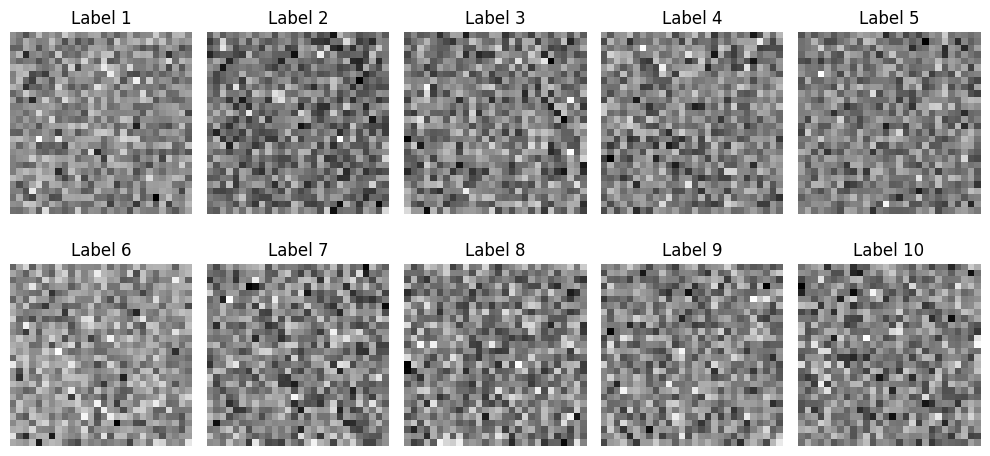

In [21]:
print('Before training:')
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
weights = model_one_layer.f.weight.data
weights = weights.numpy()
for i in range(2):
    for j in range(5):
        axs[i, j].imshow(weights[i*5+j].reshape(28, 28), cmap='gray')
        axs[i, j].set_title(f'Label {i*5+j+1}')
        axs[i, j].axis('off')
plt.tight_layout()
plt.show()

**One word**: $Feedforward$

### 4. CNN (13 points)

`Build your own CNN from scratch (3 points)` to solve this classification problem. Choose any optimizer and criterion that you want. Regulate your CNN structure and try to have as good result as possible.


**`Required outputs`**: (0.5+1+1+2+1 = 5.5 points)
1. Print the number of parameters of your cnn model.
2. Print averaged train loss and validation loss at the end of each epoch.
3. After the training finished, plot your train (validation, respectively) loss of each step (epoch, respectively) on a same graph. Keep the x-axis aligned.
4. Test your best model on test set and print (1) test loss value as well as (2) the rate of correct prediction. 
5. Display the confusion matrix of your best model on the test set.
6. `Save your best model and attach it in your submitted zip`.


4.5 points are given according to your test performance. `4.5 is given if you have correct test prediction rate > 97.00%.`

[Hint]: 
1. If you use batch normalizations, be aware of what BatchNorm does while fed with data (you will need to add two lines of codes to manage your training and testing).
2. As for confusion matrix (multi-class classfication), consider a $10\times 10$ matrix where each row represents "gt is" and each column represents "is predicted as", then do a counting with all the test samples. You will obtain a gray-scale image (2D matrix).





------------------------------------------------------------------------------------------------------------------------------------------------
`Discussion for computational cost`: 

If you have NVIDIA card on your PC, you can use `cuda` to accelerate the calculation. However, theoretically, `2 layers of CNN are enough` to have at least 97% test accuracy for this exercise. 

If your PC has no worse than Intel Core i5-8250U Processor (as had the TA's PC in 2019) and your code is well done, the program shall be guaranteed to run fast.

Conventionally, `you are encouraged to construct not too complicated CNN` to save computational cost, since MNIST is a relatively simple problem. However, `as long as your code works out for you, no point will be removed if your CNN is huge`.

------------------------------------------------------------------------------------------------------------------------------------------------


In this part, I construct a 2-layer CNN with stride and kernel size as small as possible while in & out channels as large as possible to guarantee that this model can converge ASAP.

I deploy some methods for accleration. For instance, I introduce 2 batch normalizations to manage both training and testing.

(1): First have a look at the number of parameters in my CNN:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
       BatchNorm2d-2           [-1, 32, 28, 28]              64
              ReLU-3           [-1, 32, 28, 28]               0
         MaxPool2d-4           [-1, 32, 14, 14]               0
            Conv2d-5           [-1, 64, 14, 14]          18,496
       BatchNorm2d-6           [-1, 64, 14, 14]             128
              ReLU-7           [-1, 64, 14, 14]               0
         MaxPool2d-8             [-1, 64, 7, 7]               0
           Flatten-9                 [-1, 3136]               0
           Linear-10                   [-1, 10]          31,370
Total params: 50,378
Trainable params: 50,378
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/back

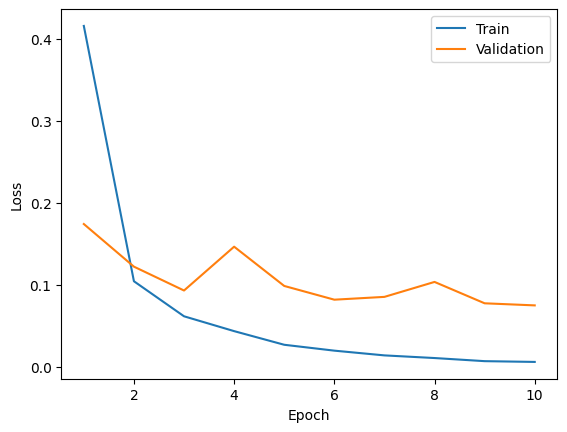



(4): Results on test set
Loss on test set: 0.0589
Rate of correct prediction on test set: 97.99%


(5): Confusion matrix on test set:


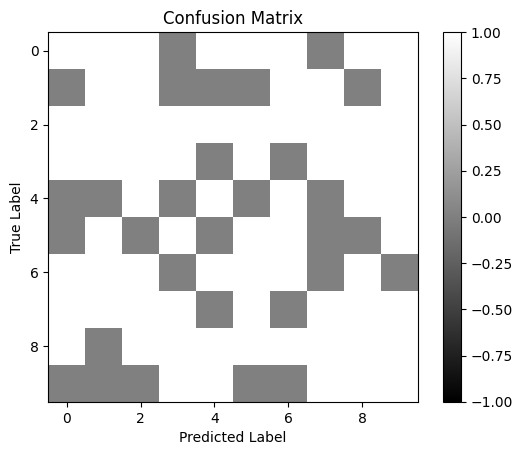

In [22]:
from torchsummary import summary
from torchmetrics.functional import confusion_matrix
# construct a 2-layer CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # fix the random seed for reproductive results
        torch.manual_seed(42)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.bn1 = nn.BatchNorm2d(32)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(64 * 7 * 7, 10)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x
    
# create an instance
model_simple_cnn = SimpleCNN()
optimizer_simple_cnn = optim.SGD(model_simple_cnn.parameters(), lr=0.01)
criterion_simple_cnn = nn.CrossEntropyLoss()
# print number of parameters
print('(1): First have a look at the number of parameters in my CNN:')
summary(model_simple_cnn, input_size=(1, 28, 28)) 
print('\n')


print('(2) & (3) results are shown as following:')
num_epochs = 10
path_cnn = 'best_cnn'
train_test(model_simple_cnn, num_epochs, train_loader, optimizer_simple_cnn, criterion_simple_cnn, path_cnn)
print('\n')


# test the model on test set
model_simple_cnn_ = torch.load(path_cnn)
testl_cnn, testa_cnn = test(model_simple_cnn_, test_loader, criterion_simple_cnn)

print('(4): Results on test set')
print("Loss on test set:", round(testl_cnn, 4))
print("Rate of correct prediction on test set:", f'{100 * testa_cnn:.2f}%')
print('\n')


# Finally calculate the confusion matrix on test set
model_simple_cnn_.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for images, labels in test_loader:
        output_cnn = model_simple_cnn_(images)
        _, pre = torch.max(output_cnn, 1)
        all_labels.extend(labels)
        all_predictions.extend(pre)
all_labels = torch.tensor(all_labels)
all_predictions = torch.tensor(all_predictions)

print('(5): Confusion matrix on test set:')
conf_m = confusion_matrix(all_labels, all_predictions, num_classes=10, task='multiclass')
plt.imshow(conf_m, cmap='gray', interpolation='nearest', vmin=-1, vmax=1)
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()